In [2]:
import pandas as pd

# Load the dataset
df_goals_and_assists = pd.read_excel('Goals & Assists.xlsx')

# Unwanted Columns List
unwanted_cols = ['Unnamed: 0', 'Player', 'Nation', 'Goals + Assists', 'Non-Penalty Goals','Penalty Goals Made', 'Penalty Attempts','Yellow Cards', 'Red Cards', 'xG', 'npxG', 'xAG', 'npxG + xAG', 'Progressive Carries','Progressive Passes','Progressive Recieves','Goals + Assists Per 90','Non-Penalty Goals + Assists Per 90','xG + xAG Per 90','npxG + xAG Per 90']
df_goals_and_assists_cleaned = df_goals_and_assists.drop(columns=unwanted_cols, errors='ignore') # Note: I changed df_goals_cleaned to df_match_cleaned

# Required Feature List
print("\nThis is the NEW, CLEANED dataframe:")
df_goals_and_assists_cleaned.head()


This is the NEW, CLEANED dataframe:


,Position,Age,Matches Played,Starts,Minutes,90s Played,Goals,Assists,Progressive Receives,Goals Per 90,Assists Per 90,Non-Penalty Goals Per 90,xG Per 90,xAG Per 90,npxG Per 90
0,AT,32,38,38,3371,37.5,29,18,488,0.77,0.48,0.53,0.67,0.38,0.49
1,DF,33,37,37,3330,37.0,3,1,6,0.08,0.03,0.08,0.06,0.02,0.06
2,MT,22,37,37,3160,35.1,0,4,55,0.00,0.11,0.00,0.03,0.09,0.03
3,MT,25,35,30,2599,28.9,5,5,80,0.17,0.17,0.17,0.10,0.16,0.10
4,DF,25,31,30,2560,28.4,1,2,3,0.04,0.07,0.04,0.06,0.03,0.06


In [3]:
# Exporting cleaned dataset to Excel Sheet
df_goals_and_assists_cleaned.to_excel('cleaned_goals_data.xlsx', index=False)

In [6]:
#Check for Any NULL Values
print(df_goals_and_assists_cleaned.isnull().sum())

Position                    0
Age                         0
Matches Played              0
Starts                      0
Minutes                     0
90s Played                  0
Goals                       0
Assists                     0
Progressive Receives        0
Goals Per 90                0
Assists Per 90              0
Non-Penalty Goals Per 90    0
xG Per 90                   0
xAG Per 90                  0
npxG Per 90                 0
dtype: int64


In [7]:
# Check for any duplicate Rows
goals_dupes = df_goals_and_assists_cleaned.duplicated().sum()
print(f"Goals and Assists Data has: {goals_dupes} duplicate rows")

Goals and Assists Data has: 211 duplicate rows


In [9]:
# Dropping the Duplicate Rows
print("\nDropping duplicates...")
df_goals_and_assists_cleaned = df_goals_and_assists_cleaned.drop_duplicates()
print(f"Goals data new duplicate count: {df_goals_and_assists_cleaned.duplicated().sum()}")


Dropping duplicates...
Goals data new duplicate count: 0


In [17]:
# Checking For Outliers
print("--- Goals and Assists Data (Outlier Check) ---")
df_goals_and_assists_cleaned.describe()

--- Goals and Assists Data (Outlier Check) ---


,Age,Matches Played,Starts,Minutes,90s Played,Goals,Assists,Progressive Receives,Goals Per 90,Assists Per 90,Non-Penalty Goals Per 90,xG Per 90,xAG Per 90,npxG Per 90
count,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000,2063.000000
mean,25.168686,19.007756,14.040717,1254.158022,13.934270,1.478429,1.035385,37.487155,0.095293,0.061997,0.088677,0.115516,0.075410,0.108565
std,4.486930,11.616860,11.514183,987.295650,10.970655,2.956424,1.777434,53.339593,0.183951,0.104475,0.174936,0.187293,0.115398,0.178613
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,3.000000,342.500000,3.800000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.010000
50%,25.000000,19.000000,12.000000,1083.000000,12.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.050000,0.040000,0.050000
75%,28.000000,30.000000,24.000000,2107.500000,23.400000,2.000000,1.000000,50.500000,0.120000,0.090000,0.110000,0.140000,0.110000,0.140000
max,41.000000,38.000000,38.000000,3420.000000,38.000000,29.000000,18.000000,488.000000,2.430000,1.010000,2.430000,3.530000,2.470000,3.530000


Plotting boxplots for all 14 numeric columns in df_goals:



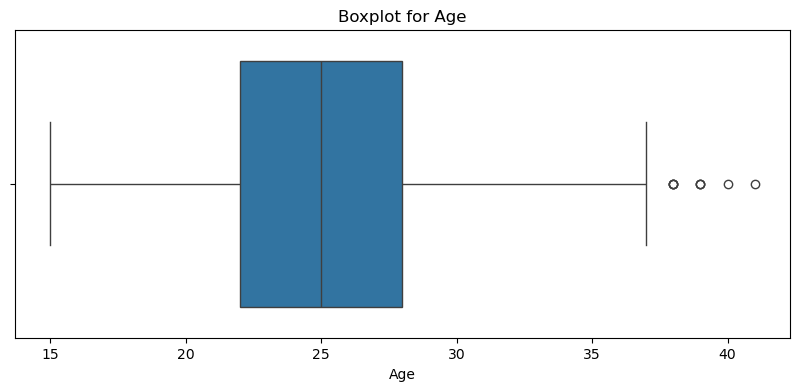

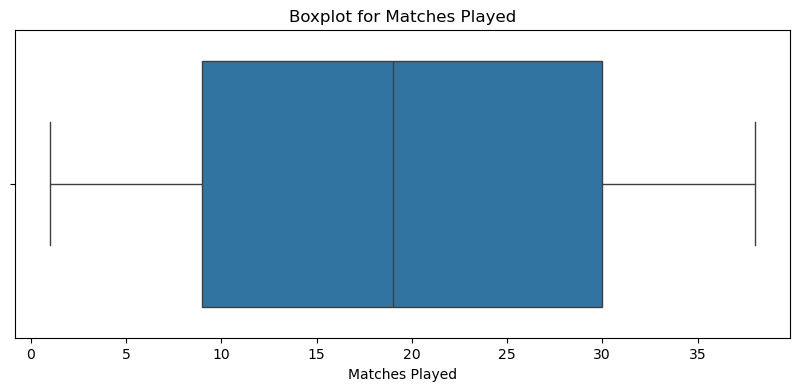

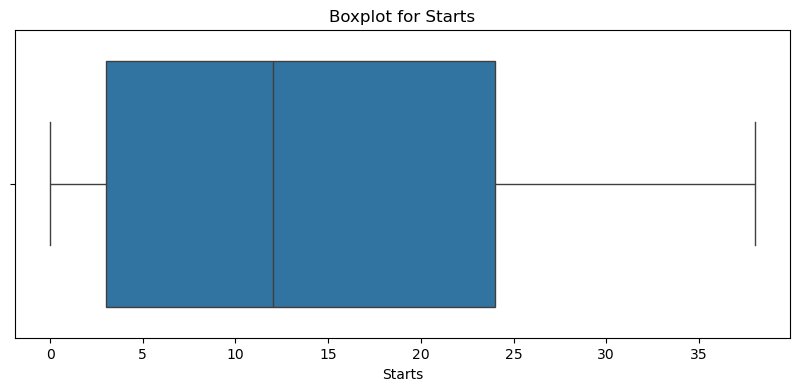

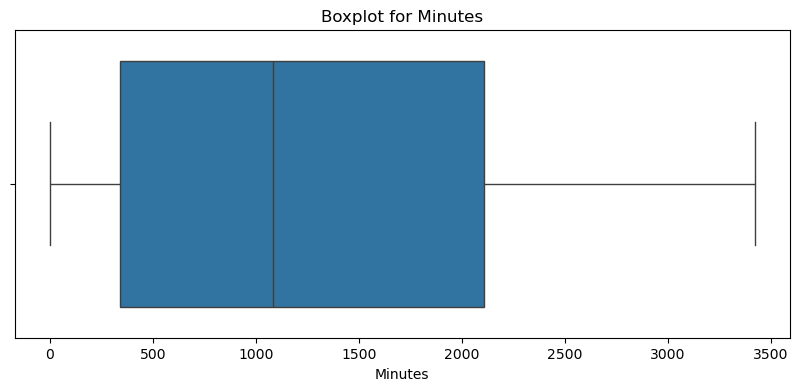

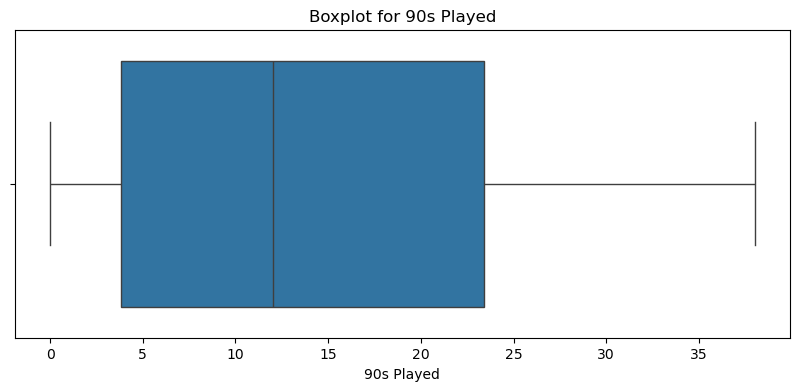

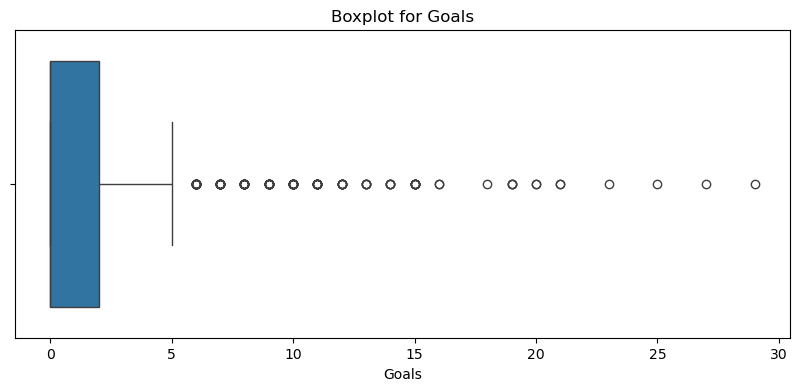

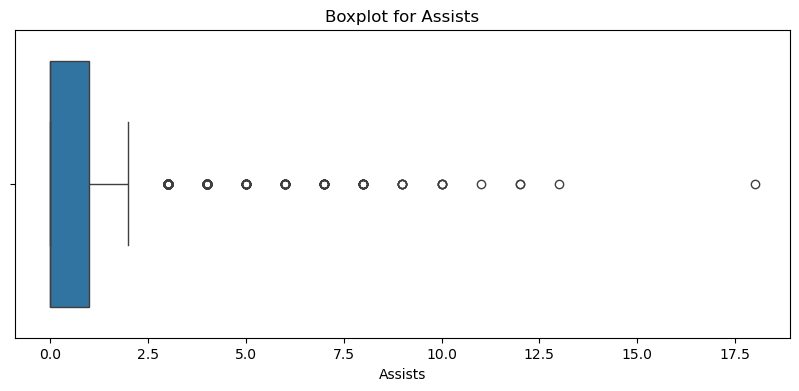

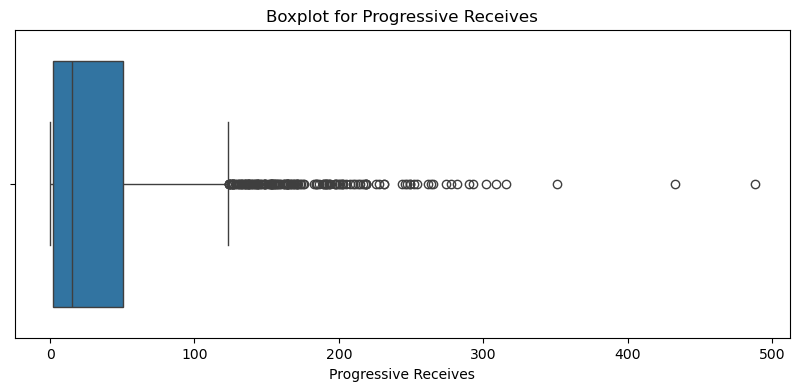

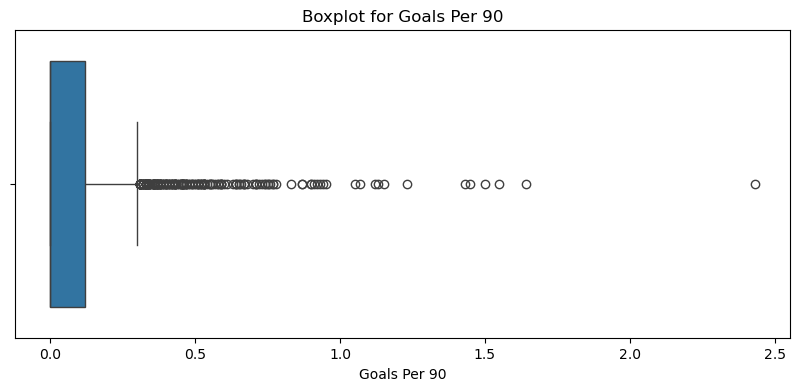

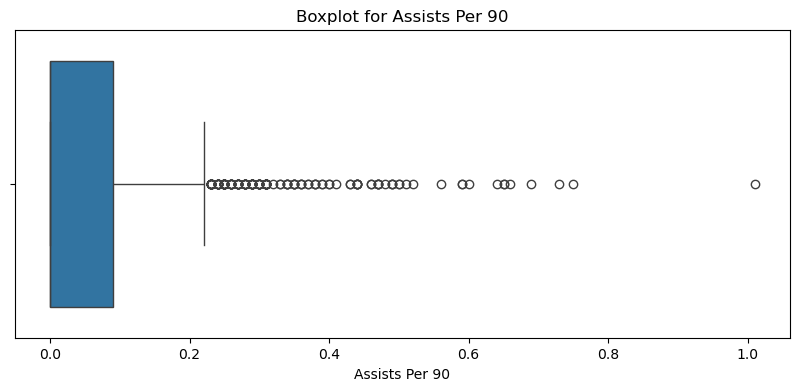

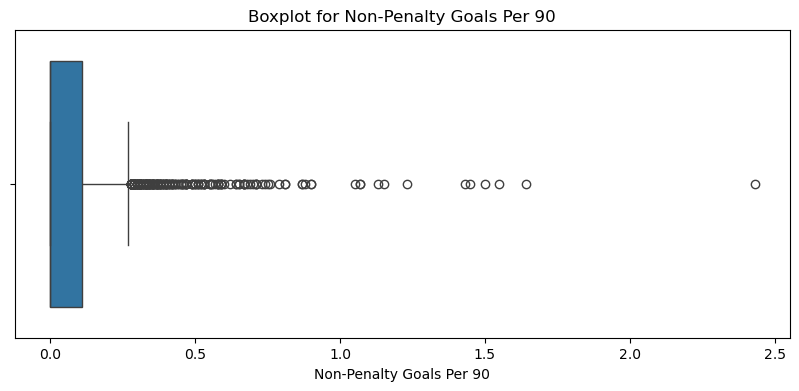

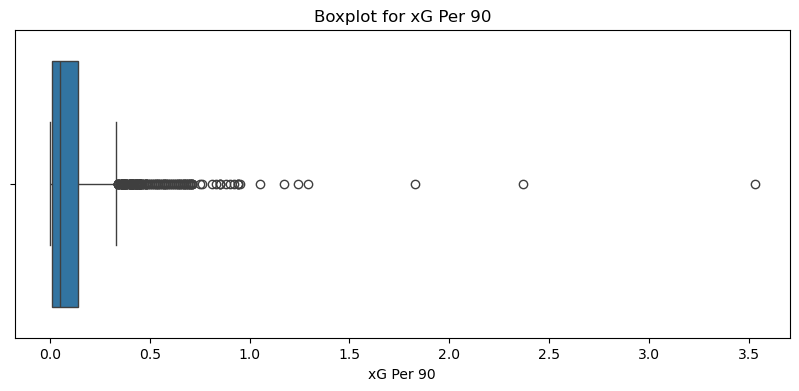

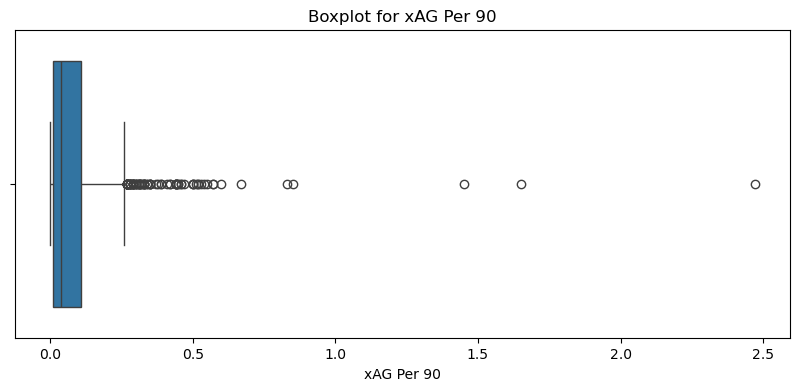

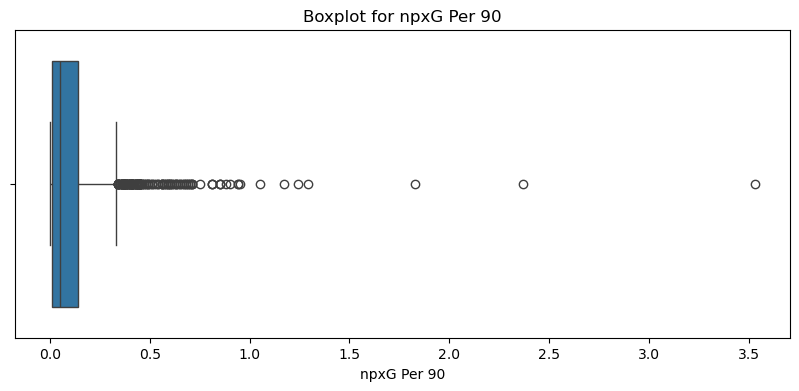


--- All numeric columns have been plotted. ---


In [61]:
# Plotting BoxPlots for all the Numerical Features
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns      

# Get a list of all columns that are numbers (int64 or float64)
numeric_cols = df_goals_and_assists_cleaned.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns in df_goals:\n")
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_goals_and_assists_cleaned[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()
print("\n--- All numeric columns have been plotted. ---")

In [62]:
# Removing Outliers
import pandas as pd
import numpy as np

def remove_outliers_iqr_targeted_with_report(df, columns_to_check):
    """
    Removes outliers based on IQR and returns TWO dataframes:
    1. The filtered data
    2. The removed data (outliers)
    """
    df_original = df.copy()
    
    # We will create a boolean mask initialized to True (Keep everything initially)
    # As we find outliers, we mark them as False
    mask = pd.Series(True, index=df_original.index)
    
    print(f"Original shape: {df_original.shape}")
    
    for col in columns_to_check:
        # Calculate IQR on the ORIGINAL data (or current filtered state depending on preference)
        # Usually, it is safer to calculate bounds based on the current iteration 
        # to handle extreme skew, but calculating on original is also valid.
        # Here we follow your original iterative logic:
        
        # Current valid rows based on previous iterations
        current_valid_data = df_original[mask]
        
        Q1 = current_valid_data[col].quantile(0.25)
        Q3 = current_valid_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Update the mask: The row must CURRENTLY be True AND within new bounds
        # If it fails this column, it becomes False
        col_mask = (df_original[col] >= lower_bound) & (df_original[col] <= upper_bound)
        
        # Combine with existing mask
        mask = mask & col_mask

    # Split the data based on the final mask
    df_filtered = df_original[mask]
    df_removed = df_original[~mask] # The tilde (~) inverts the mask
    
    print(f"\nNew shape after trimming: {df_filtered.shape}")
    print(f"Total rows removed: {len(df_removed)}")
    
    return df_filtered, df_removed

print("--- Processing Goals and Assists Data ---")

try:
    cols_to_trim_goals = [
        'Progressive Receives', 
        'Goals Per 90', 
        'Assists Per 90', 
        'Non-Penalty Goals Per 90', 
        'xG Per 90', 
        'xAG Per 90', 
        'npxG Per 90'
    ]
    
    # Unpack both return values
    df_clean, df_outliers = remove_outliers_iqr_targeted_with_report(df_goals_and_assists_cleaned, cols_to_trim_goals)
    
    # Save both
    df_clean.to_excel("goals_assists_data_trimmed_outliers.xlsx", index=False)
    df_outliers.to_excel("goals_assists_data_trimmed_outliers.xlsx", index=False)
    
    print("\nProcessing complete.")
    print("1. Clean data saved to: goals_assists_data_trimmed_outliers.xlsx")
    print("2. Removed rows saved to: goals_assists_data_trimmed_outliers.xlsx")

except NameError:
    print("Error: Dataframe not found in memory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Processing Goals and Assists Data ---
Original shape: (2063, 15)

New shape after trimming: (1204, 15)
Total rows removed: 859

Processing complete.
1. Clean data saved to: goals_assists_data_trimmed_outliers.xlsx
2. Removed rows saved to: goals_assists_data_trimmed_outliers.xlsx


Plotting boxplots for all 14 numeric columns after removing outliers in df_clean:



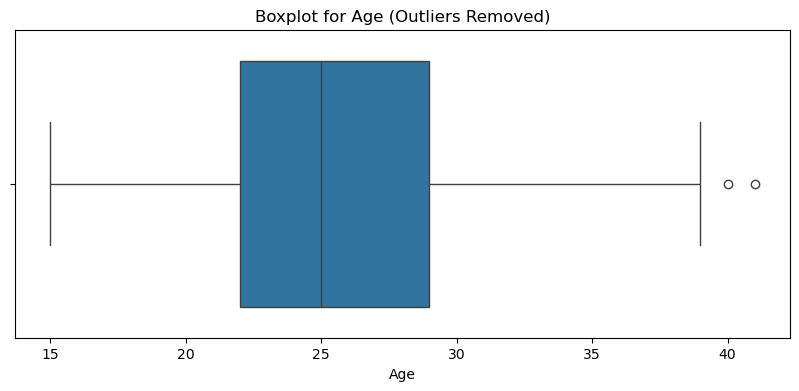

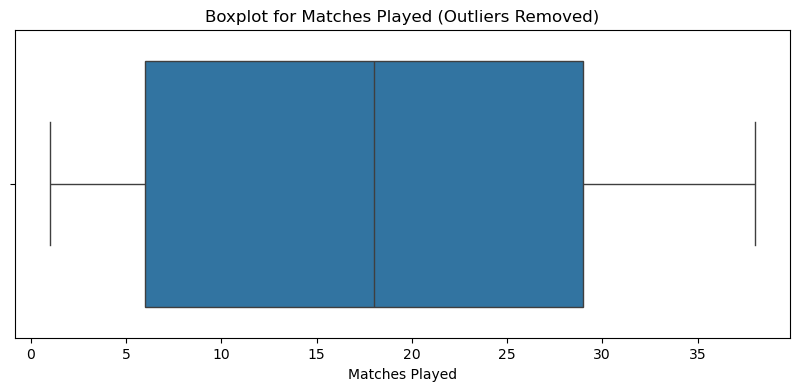

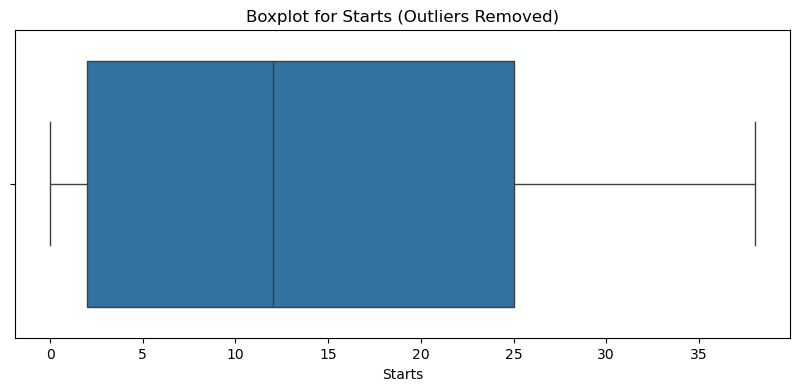

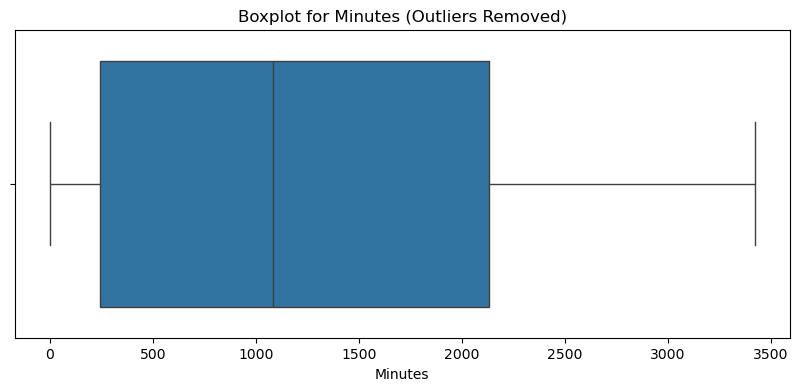

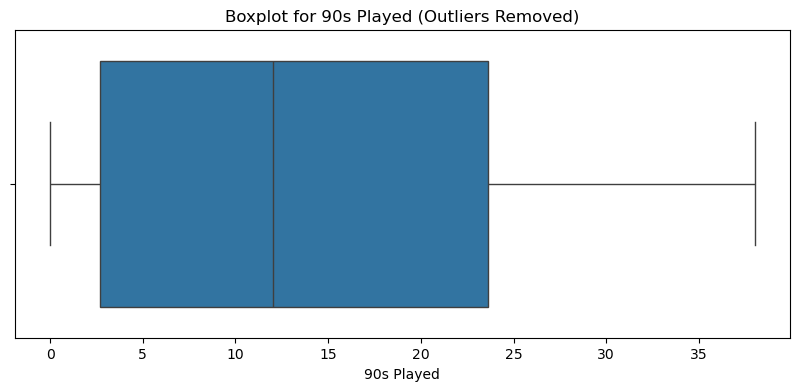

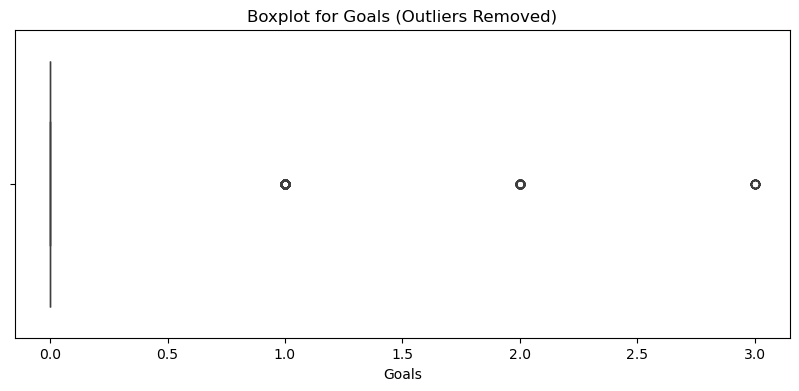

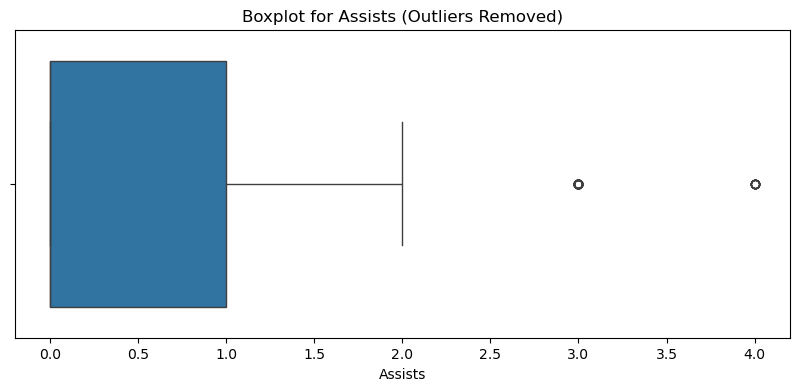

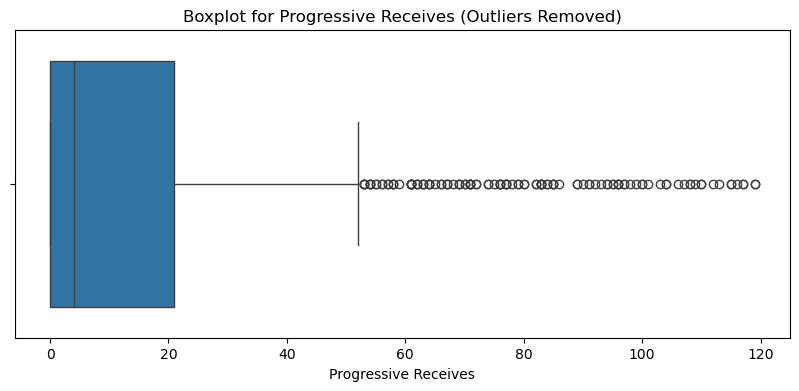

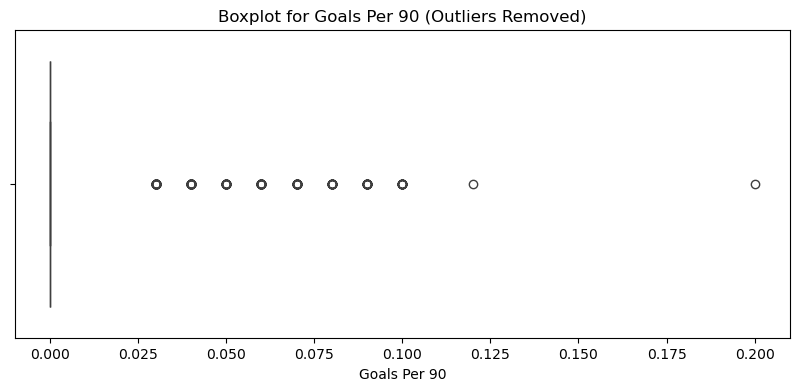

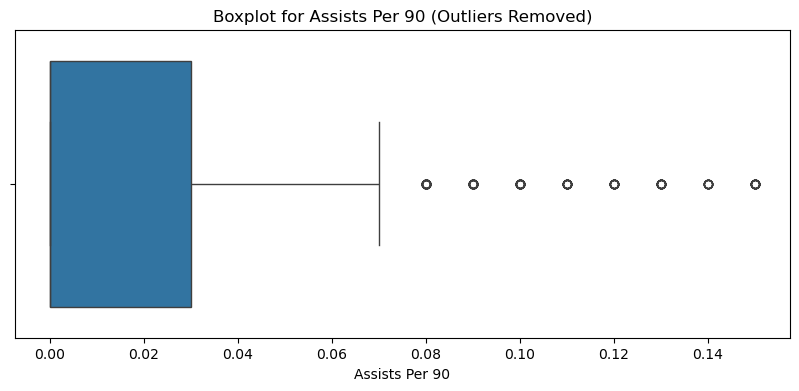

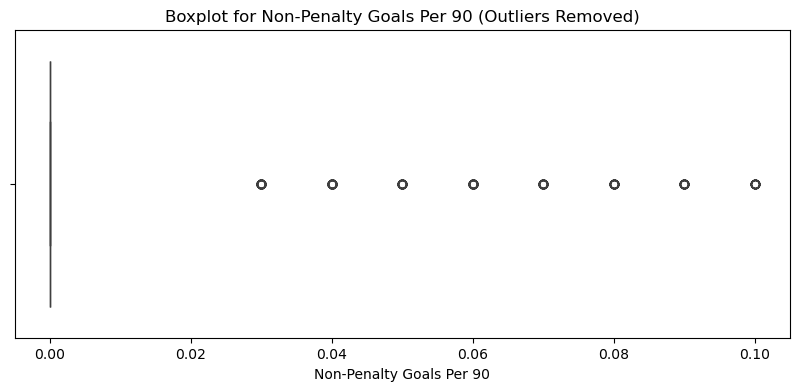

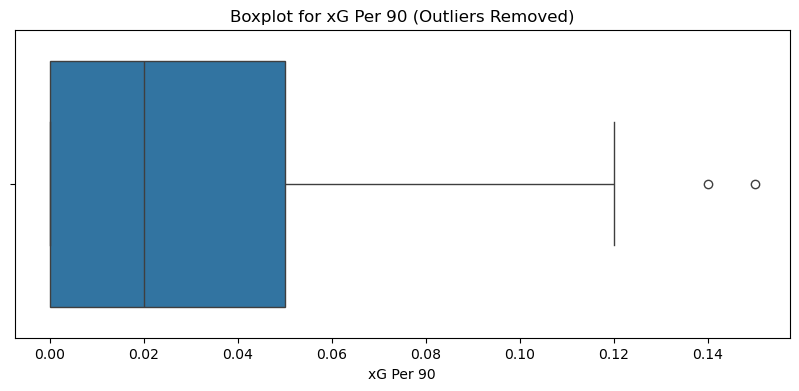

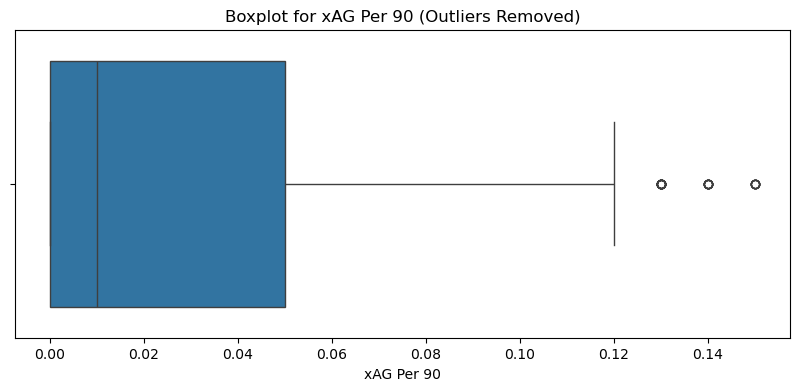

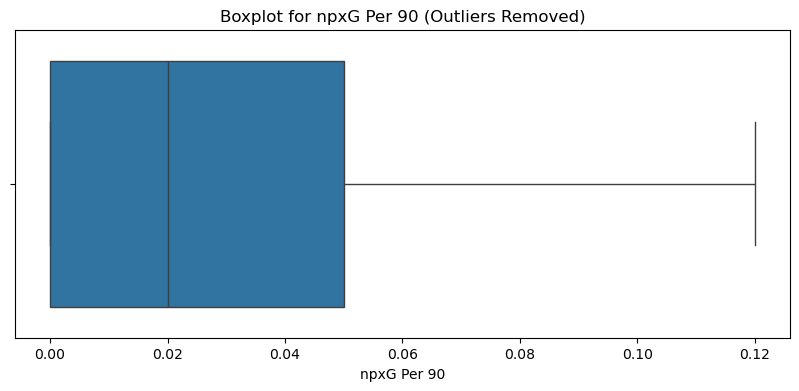


--- All numeric columns have been plotted. ---


In [63]:
# Plotting BoxPlots for all the Numerical Features after removing outliers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns      

# Get a list of all columns that are numbers (int64 or float64)
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

print(f"Plotting boxplots for all {len(numeric_cols)} numeric columns after removing outliers in df_clean:\n")
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot for {col} (Outliers Removed)')
    plt.xlabel(col)
    plt.show()
print("\n--- All numeric columns have been plotted. ---")

In [64]:
import pandas as pd
import numpy as np

print("--- Categorical Analysis for Trimmed Player Stats (Goals & Assists) ---")

try:
    # Load the data
    df_player_stats = pd.read_excel("goals_assists_data_trimmed_outliers.xlsx")
    print("Loaded 'goals_assists_data_trimmed_outliers.xlsx' into 'df_player_stats'.\n")

    # 1. Basic Counts (Applies to the whole dataset)
    print("1. Player Counts by Position:")
    # We use the new variable name here
    print(df_player_stats['Position'].value_counts())
    print("\n")
    
    # 2. Target Analysis by Category (Goals)
    print("2. Average GOALS by Position:")
    # And here
    print(df_player_stats.groupby('Position')['Goals'].mean().sort_values(ascending=False))
    print("\n")

    # 3. Target Analysis by Category (Assists)
    print("3. Average ASSISTS by Position:")
    # And here
    print(df_player_stats.groupby('Position')['Assists'].mean().sort_values(ascending=False))
    
    print("\n--- Categorical analysis complete ---")

except FileNotFoundError:
    print("Error: 'goals_assists_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Categorical Analysis for Trimmed Player Stats (Goals & Assists) ---
Loaded 'goals_assists_data_trimmed_outliers.xlsx' into 'df_player_stats'.

1. Player Counts by Position:
Position
AT       273
MT       213
MT,AT    176
DF       158
MT,DF     39
Name: count, dtype: int64


2. Average GOALS by Position:
Position
AT       4.985348
MT,AT    2.732955
MT       2.492958
MT,DF    2.025641
DF       1.398734
Name: Goals, dtype: float64


3. Average ASSISTS by Position:
Position
MT,AT    2.107955
MT,DF    2.000000
MT       1.892019
DF       1.879747
AT       1.776557
Name: Assists, dtype: float64

--- Categorical analysis complete ---


--- Goals Data: Relationship Analysis ---
Loaded 'goals_assists_data_trimmed_outliers.xlsx': (859, 15)

--- Correlation Matrix (Trimmed Goals Data) ---


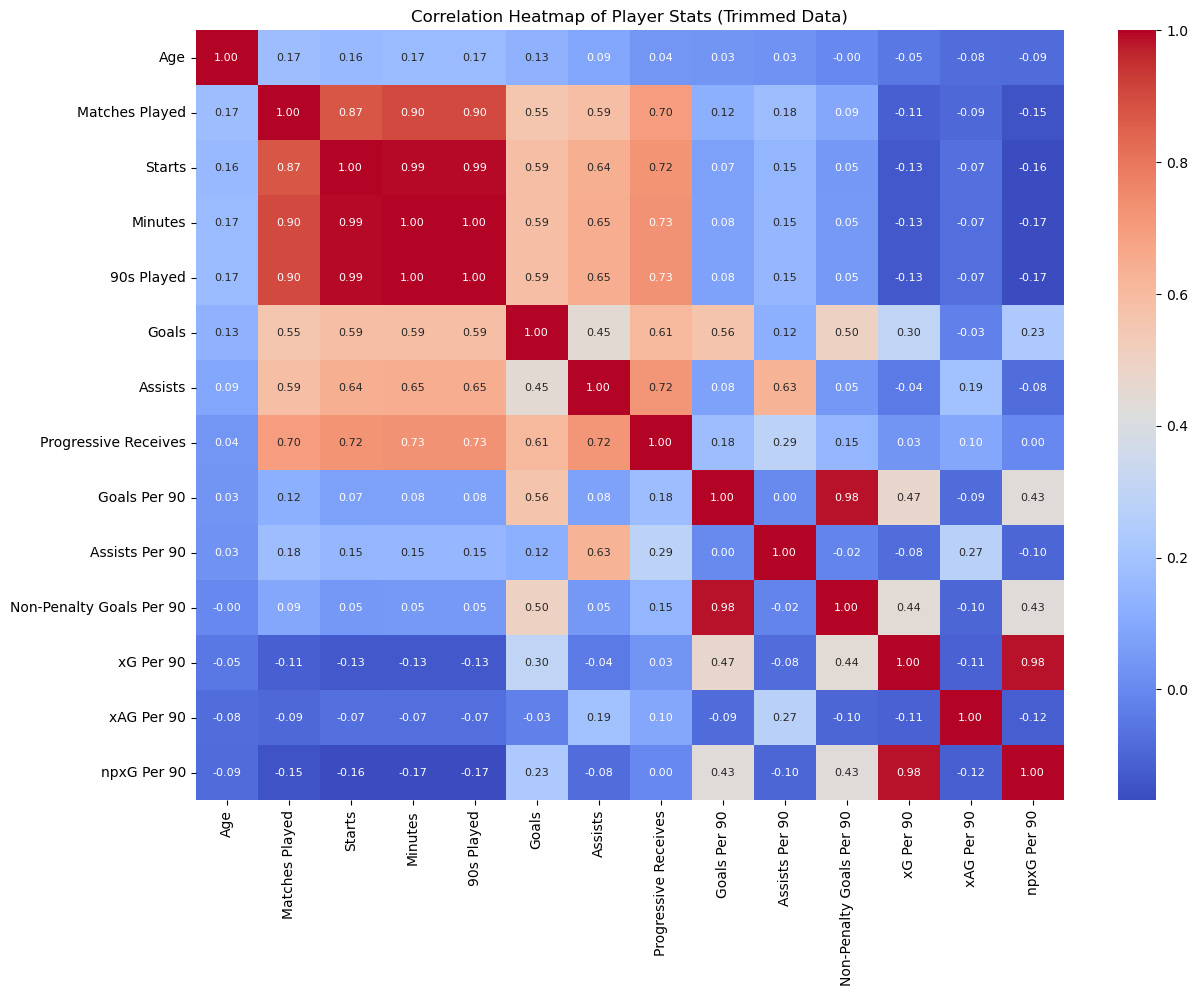


--- Average Stats by Position (from Trimmed Data) ---
             Goals   Assists  Progressive Receives  Goals Per 90
Position                                                        
AT        4.985348  1.776557             81.952381      0.321538
MT,AT     2.732955  2.107955             75.818182      0.212955
MT        2.492958  1.892019             44.812207      0.163333
MT,DF     2.025641  2.000000             58.871795      0.135641
DF        1.398734  1.879747             63.677215      0.092152

--- Goals relationship analysis complete ---


In [65]:
# Plotting Heatmap for Correlation Matrix (GOALS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- Goals Data: Relationship Analysis ---")

try:
    # 1. Load the data
    df_goals_assists_trimmed = pd.read_excel("goals_assists_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_assists_data_trimmed_outliers.xlsx': {df_goals_assists_trimmed.shape}")

    # 2. Correlation Matrix
    print("\n--- Correlation Matrix (Trimmed Goals Data) ---")
    
    # Select only numeric columns
    numeric_cols = df_goals_assists_trimmed.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    
    # Create a heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8})
    plt.title('Correlation Heatmap of Player Stats (Trimmed Data)')
    plt.show()

    # 3. Categorical vs. Numeric (Grouped Averages)
    print("\n--- Average Stats by Position (from Trimmed Data) ---")
    key_stats = ['Goals', 'Assists', 'Progressive Receives', 'Goals Per 90']
    
    # Group by 'Position' and calculate the mean for key stats
    position_stats = df_goals_assists_trimmed.groupby('Position')[key_stats].mean()
    print(position_stats.sort_values(by='Goals', ascending=False))

    print("\n--- Goals relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'goals_assists_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Assists Data: Relationship Analysis ---
Loaded 'goals_assists_data_trimmed_outliers.xlsx': (859, 15)

--- Correlation Matrix (Trimmed Goals & Assists Data) ---


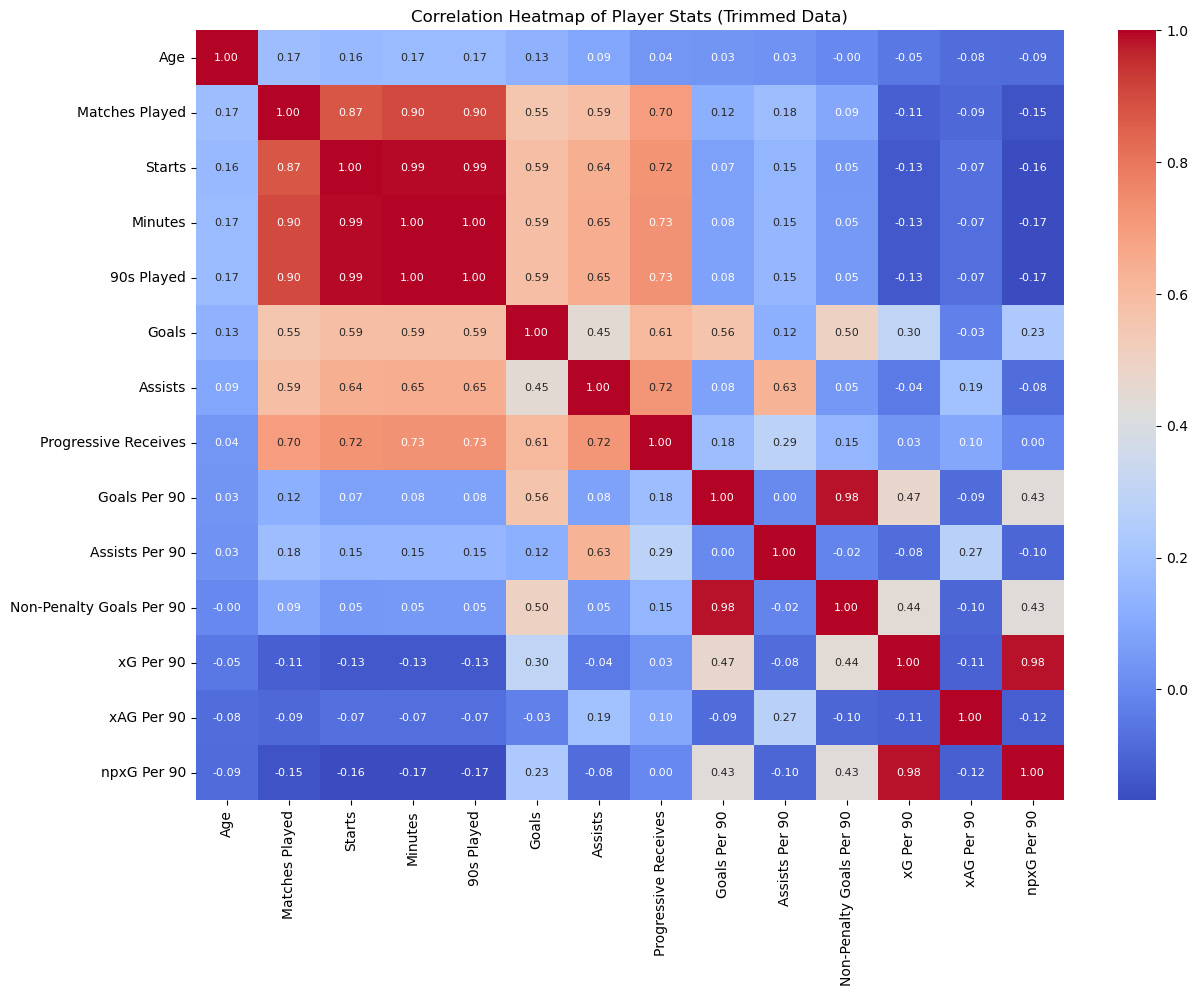


--- Average Stats by Position (from Trimmed Data) ---
           Assists  Assists Per 90  xAG Per 90  Progressive Receives
Position                                                            
MT,AT     2.107955        0.142102    0.168011             75.818182
MT,DF     2.000000        0.128205    0.132051             58.871795
MT        1.892019        0.127230    0.160704             44.812207
DF        1.879747        0.112975    0.120063             63.677215
AT        1.776557        0.106081    0.117766             81.952381

--- Assists relationship analysis complete ---


In [66]:
# Plotting Heatmap for Correlation Matrix (ASSISTS)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Main script ---
print("--- Assists Data: Relationship Analysis ---")

try:
    # 1. Load the data
    df_goals_assists_trimmed = pd.read_excel("goals_assists_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_assists_data_trimmed_outliers.xlsx': {df_goals_assists_trimmed.shape}")

    # 2. Correlation Matrix
    print("\n--- Correlation Matrix (Trimmed Goals & Assists Data) ---")
    
    # Select only numeric columns
    numeric_cols = df_goals_assists_trimmed.select_dtypes(include=[np.number])
    corr_matrix = numeric_cols.corr()
    
    # Create a heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                annot_kws={"size": 8})
    plt.title('Correlation Heatmap of Player Stats (Trimmed Data)')
    plt.show()

    # 3. Categorical vs. Numeric (Grouped Averages)
    print("\n--- Average Stats by Position (from Trimmed Data) ---")
    key_stats = ['Assists', 'Assists Per 90', 'xAG Per 90', 'Progressive Receives']
    
    # Group by 'Position' and calculate the mean for key stats
    position_stats = df_goals_assists_trimmed.groupby('Position')[key_stats].mean()
    print(position_stats.sort_values(by='Assists', ascending=False))

    print("\n--- Assists relationship analysis complete ---")

except FileNotFoundError:
    print("Error: 'goals_assists_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [67]:
# Save to Excel File
df_goals_assists_trimmed.to_excel('goals_assists_data_trimmed_outliers.xlsx', index=False)

XGBoost not found. Skipping XGBoost model.
--- Building Advanced Regression Pipeline for Goals & Assists ---
Loaded 'goals_assists_data_trimmed_outliers.xlsx': (859, 15)
Categorical features: ['Position']
Numeric features: ['Age', 'Matches Played', 'Starts', 'Minutes', '90s Played', 'Progressive Receives', 'Goals Per 90', 'Assists Per 90', 'Non-Penalty Goals Per 90', 'xG Per 90', 'xAG Per 90', 'npxG Per 90']

  TRAINING MODELS FOR TARGET: Goals


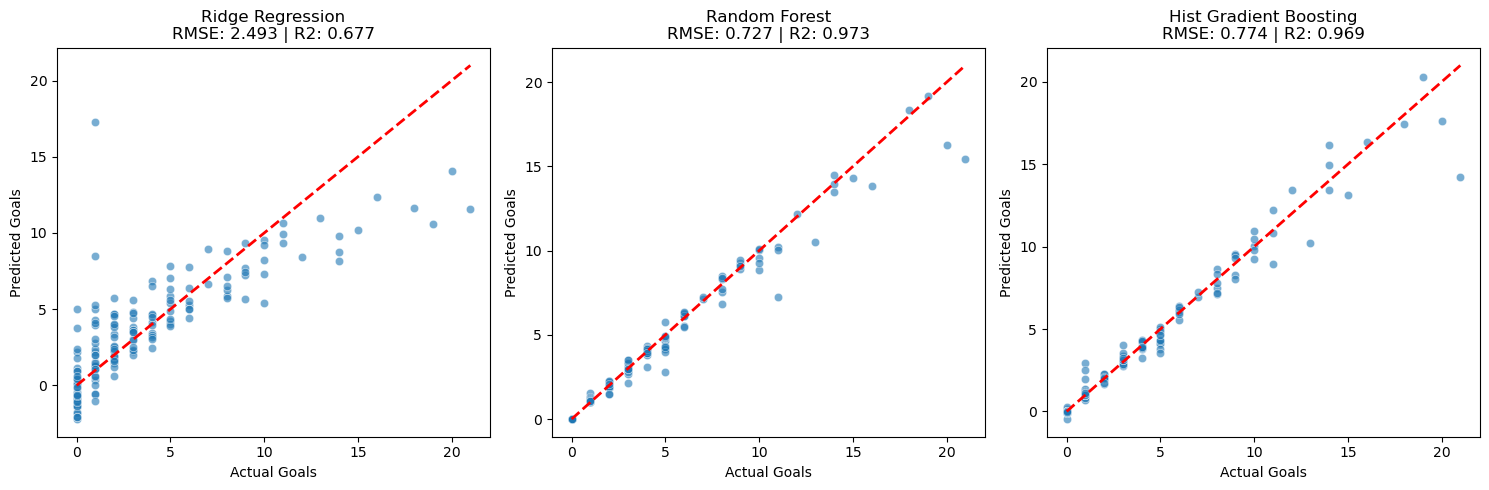


--- Final Leaderboard for Goals ---
                 Model  CV Mean R2  Test MAE  Test RMSE  Test R2
         Random Forest    0.967287  0.296657   0.727317 0.972526
Hist Gradient Boosting    0.945808  0.349358   0.773817 0.968901
      Ridge Regression    0.699720  1.594132   2.493040 0.677205

  TRAINING MODELS FOR TARGET: Assists


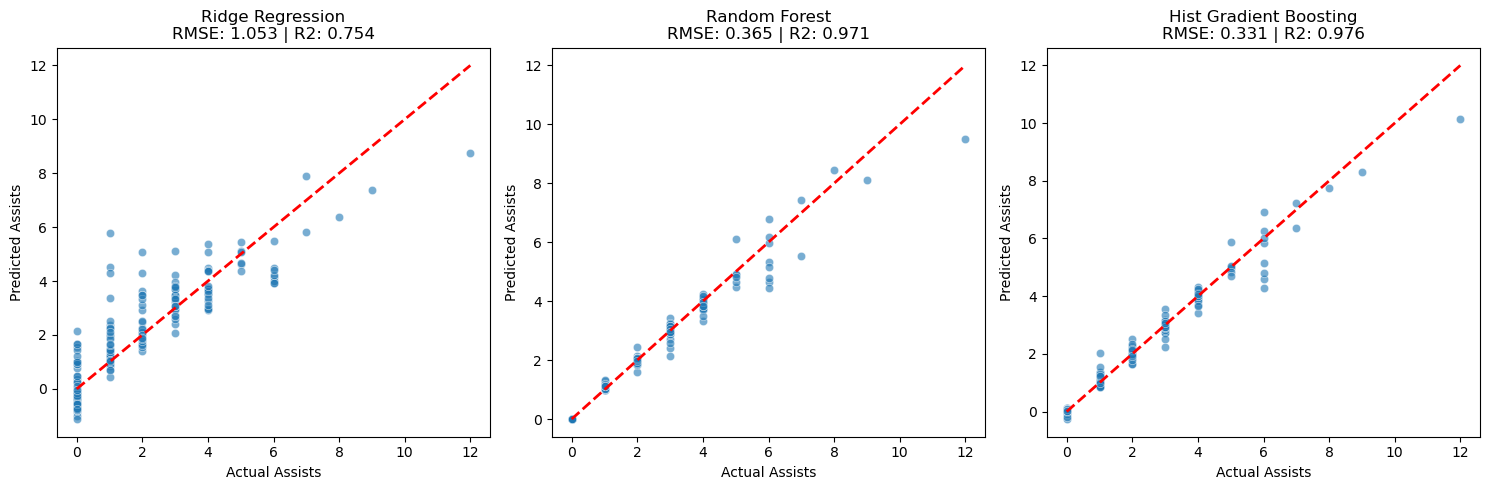


--- Final Leaderboard for Assists ---
                 Model  CV Mean R2  Test MAE  Test RMSE  Test R2
Hist Gradient Boosting    0.972003  0.165776   0.331362 0.975663
         Random Forest    0.974810  0.163256   0.364686 0.970522
      Ridge Regression    0.737067  0.756124   1.052626 0.754408


In [75]:
# Multiple Model Trainings for Goals And Assists
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Try importing XGBoost
try:
    import xgboost as xgb
    has_xgb = True
except ImportError:
    has_xgb = False
    print("XGBoost not found. Skipping XGBoost model.")

# --- Main Script ---
print("--- Building Advanced Regression Pipeline for Goals & Assists ---")

try:
    # 1. Load your specific cleaned data
    df = pd.read_excel("goals_assists_data_trimmed_outliers.xlsx")
    print(f"Loaded 'goals_assists_data_trimmed_outliers.xlsx': {df.shape}")

    # 2. Define Targets and Features
    targets = ["Goals", "Assists"]
    
    # Define columns to use (exclude the targets themselves from features)
    categorical_features = ["Position"]
    
    # Dynamically select all numeric columns except the targets
    numeric_features = [c for c in df.select_dtypes(include=np.number).columns 
                        if c not in targets]

    print(f"Categorical features: {categorical_features}")
    print(f"Numeric features: {numeric_features}")

    # 3. Setup Preprocessing Pipeline
    # This handles Scaling (numbers) and OneHotEncoding (text) automatically
    
    # For Categorical: Fill missing with 'missing', then OneHotEncode
    cat_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    # For Numeric: Fill missing with median, then Scale
    num_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # Bundle them together
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", cat_transformer, categorical_features),
            ("num", num_transformer, numeric_features),
        ],
        remainder="drop"
    )

    # 4. Define Models to Evaluate
    models = {
        "Ridge Regression": Ridge(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42),
        "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
    }
    if has_xgb:
        models["XGBoost"] = xgb.XGBRegressor(n_jobs=-1, random_state=42)

    # 5. Training & Evaluation Loop
    
    # Setup Cross-Validation strategy (5 folds)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for target_col in targets:
        print(f"\n{'='*40}")
        print(f"  TRAINING MODELS FOR TARGET: {target_col}")
        print(f"{'='*40}")
        
        # Prepare X and y
        X = df.drop(columns=targets) # Drop BOTH targets to avoid leakage
        y = df[target_col]

        # Split Data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model_results = []
        
        # Setup plot for this target
        n_models = len(models)
        fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5))
        if n_models == 1: axes = [axes] # Handle single model case
        
        for i, (name, regressor) in enumerate(models.items()):
            # Create the full pipeline: Preprocessor + Regressor
            pipe = Pipeline([("preprocessor", preprocessor), ("regressor", regressor)])
            
            # A. Cross-Validation (The "Robust" Check)
            # Returns negative MSE, so we flip it
            cv_mse = -cross_val_score(pipe, X_train, y_train, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
            cv_rmse = np.sqrt(cv_mse)
            cv_r2 = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="r2", n_jobs=-1)
            
            # B. Final Test on Hold-Out Data
            pipe.fit(X_train, y_train)
            y_pred = pipe.predict(X_test)
            
            test_mae = mean_absolute_error(y_test, y_pred)
            test_mse = mean_squared_error(y_test, y_pred)
            test_rmse = np.sqrt(test_mse)
            test_r2 = r2_score(y_test, y_pred)
            
            # Store results
            model_results.append({
                "Model": name,
                "CV Mean R2": cv_r2.mean(),
                "Test MAE": test_mae,
                "Test RMSE": test_rmse,
                "Test R2": test_r2
            })
            
            # C. Visualization
            ax = axes[i]
            sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=ax)
            # Perfect prediction line
            ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
            ax.set_xlabel(f"Actual {target_col}")
            ax.set_ylabel(f"Predicted {target_col}")
            ax.set_title(f"{name}\nRMSE: {test_rmse:.3f} | R2: {test_r2:.3f}")

        plt.tight_layout()
        plt.show()
        
        # Print Comparison Table
        results_df = pd.DataFrame(model_results).sort_values(by="Test RMSE")
        print(f"\n--- Final Leaderboard for {target_col} ---")
        print(results_df.to_string(index=False))

except FileNotFoundError:
    print("Error: 'goals_assists_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run 'process_goals_data.py' first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [79]:
# Running Example Prediction (Random Forest)
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# --- Main Script ---
print("--- Running Example Prediction (Random Forest) ---")

try:
    # 1. Load Data & Train the Best Model (Random Forest)
    # FIXED: Updated filename to match the standard used in training
    df = pd.read_excel("goals_data_trimmed_outliers.xlsx")
    
    # Define targets
    target_goals = "Goals"
    target_assists = "Assists"
    targets = [target_goals, target_assists]
    
    # Define columns to use
    categorical_features = ["Position"]
    # NOTE: We align numeric features to be exactly what we have in the dataframe minus targets
    numeric_features = [c for c in df.select_dtypes(include=np.number).columns 
                        if c not in targets]

    # Setup Preprocessing Pipeline
    cat_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])
    num_transformer = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ("cat", cat_transformer, categorical_features),
            ("num", num_transformer, numeric_features),
        ],
        remainder="drop"
    )

    # Create Pipelines for Goals and Assists
    # We use RandomForest as it was our "Winner"
    pipeline_goals = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42))
    ])
    
    pipeline_assists = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42))
    ])

    # Fit the models on the FULL dataset
    X = df.drop(columns=targets)
    y_goals = df[target_goals]
    y_assists = df[target_assists]
    
    print("Training Goals Model...")
    pipeline_goals.fit(X, y_goals)
    
    print("Training Assists Model...")
    pipeline_assists.fit(X, y_assists)
    
    # 2. Create a "Fake" Player to Predict
    print("\n--- Creating Example Player ---")
    
    # To safely predict, we need a DataFrame that matches the structure of 'X'.
    # We will create a single row with the SAME columns as X, filled with median values,
    # and then overwrite the specific stats we care about.
    example_player = pd.DataFrame(columns=X.columns)
    example_player.loc[0] = pd.NA # Initialize row
    
    # Fill numeric cols with median (neutral assumption for stats we don't set)
    for col in X.select_dtypes(include=np.number).columns:
        example_player[col] = X[col].median()
        
    # Set specific values for our "Elite Striker"
    example_player['Position'] = 'FW' # Assuming 'FW' or 'AT' exists in your data
    example_player['Age'] = 24
    example_player['Matches Played'] = 38
    example_player['Starts'] = 38
    example_player['Minutes'] = 3400
    # example_player['90s Played'] = 37.8 # Uncomment if this column exists in your data
    example_player['Progressive Receives'] = 300
    example_player['Goals Per 90'] = 0.8
    example_player['Assists Per 90'] = 0.2
    example_player['Non-Penalty Goals Per 90'] = 0.7
    example_player['xG Per 90'] = 0.75
    example_player['xAG Per 90'] = 0.2
    example_player['npxG Per 90'] = 0.65

    print("Player Stats (Selected):")
    print(example_player[['Position', 'Minutes', 'xG Per 90', 'Goals Per 90']].T)

    # 3. Make Predictions
    pred_goals = pipeline_goals.predict(example_player)[0]
    pred_assists = pipeline_assists.predict(example_player)[0]

    print(f"\n{'='*40}")
    print(f"  MODEL PREDICTION FOR THIS PLAYER")
    print(f"{'='*40}")
    print(f"Predicted Goals:   {pred_goals:.2f}")
    print(f"Predicted Assists: {pred_assists:.2f}")
    print(f"{'='*40}")
    
    print("\nInterpretation:")
    print(f"Based on playing {example_player['Minutes'][0]} minutes and having an xG per 90 of {example_player['xG Per 90'][0]},")
    print(f"the model predicts this player would score {pred_goals:.0f} or {pred_goals+1:.0f} goals.")

except FileNotFoundError:
    print("Error: 'goals_data_trimmed_outliers.xlsx' not found.")
    print("Please make sure you have successfully run the outlier removal script and saved the CLEAN data.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Running Example Prediction (Random Forest) ---
Training Goals Model...
Training Assists Model...

--- Creating Example Player ---
Player Stats (Selected):
                 0
Position        FW
Minutes       3400
xG Per 90     0.75
Goals Per 90   0.8

  MODEL PREDICTION FOR THIS PLAYER
Predicted Goals:   2.37
Predicted Assists: 2.88

Interpretation:
Based on playing 3400 minutes and having an xG per 90 of 0.75,
the model predicts this player would score 2 or 3 goals.
